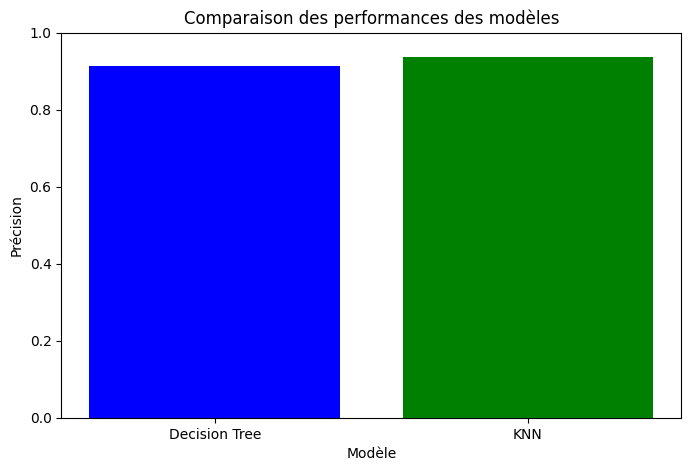

Decision Tree Accuracy après tuning : 0.91
KNN Accuracy après recherche d'hyperparamètres : 0.94


In [59]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import ast
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

# Fonction pour charger le dataset
def load_dataset(csv_file):
    """Charge le dataset depuis un fichier CSV."""
    data = []
    labels = []
    with open(csv_file, 'r') as f:
        reader = csv.reader(f)
        next(reader)  # Ignorer l'en-tête
        for row in reader:
            labels.append(int(row[0]))  # La première colonne est le label
            # Safely evaluate the string representation of the board
            board = ast.literal_eval(row[1])
            # Flatten the board into a 1D array
            board = [item for sublist in board for item in sublist]
            data.append(board)
    return np.array(data), np.array(labels)

# Charger le dataset
file_path = "dataset_cleaned.csv" 
data, labels = load_dataset(file_path)

# Mélanger les données et les étiquettes de manière synchronisée
data, labels = shuffle(data, labels, random_state=42)

# Division des données
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Arbre de Décision (avec validation croisée)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

# 2. KNN (avec hyperparamètres optimisés)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# 3. Comparaison des modèles
models = ["Decision Tree", "KNN"]
accuracies = [dt_accuracy, knn_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.xlabel("Modèle")
plt.ylabel("Précision")
plt.title("Comparaison des performances des modèles")
plt.show()

# Affichage des résultats
print(f"Decision Tree Accuracy après tuning : {dt_accuracy:.2f}")
print(f"KNN Accuracy après recherche d'hyperparamètres : {knn_accuracy:.2f}")
